# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En este proyecto estaremos trabajando la data provista por Megaline, la cual sera analizada, preprocesarla, corregida y enriquecida en caso de ser necesario, para poder proceder a crear nuestras hipotesis sobre sus planes prepago, y asi poder sugerir pertinentemente cual de los 2 planes es el que genera mas ingresos, para que ellos puedan ajustar el presupuesto de publicidad para este, estare visualizando la data con algunos graficos para que sea mas entendible lo que estamos evaluando y para que se pueda tomar la decision adecuada en las conclusiones.
</div>

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import os
import math
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca hemos cargado las librerias que estaremos usando en el proyecto, para calcular y visualizar las evaluaciones que estaremos realizando.
</div>

## Cargar los datos

In [2]:
# Nombre de tus archivos CSV
file_names = [
    "/datasets/megaline_calls.csv",
    "/datasets/megaline_internet.csv",
    "/datasets/megaline_messages.csv",
    "/datasets/megaline_plans.csv",
    "/datasets/megaline_users.csv"
]

# Crear un diccionario para almacenar los DataFrames
dataframes = {}

# Iterar a través de los nombres de archivo y cargar los datos en DataFrames
for file_name in file_names:
    # Usa try-except para manejar cualquier error al cargar archivos
    try:
        # Obtener el nombre base del archivo sin la extensión
        base_name = os.path.basename(file_name)
        key = os.path.splitext(base_name)[0]
        # Cargar el archivo CSV en un DataFrame y almacenarlo en el diccionario
        dataframes[key] = pd.read_csv(file_name)
        print(f"Archivo {base_name} cargado exitosamente.")
    except Exception as e:
        print(f"Error al cargar {file_name}: {str(e)}")

# Ahora puedes acceder a los DataFrames utilizando nombres de archivo sin la extensión como claves
# Por ejemplo, para acceder al DataFrame de megaline_calls.csv:
df_megaline_calls = dataframes['megaline_calls']

# Para acceder al DataFrame de megaline_internet.csv:
df_megaline_internet = dataframes['megaline_internet']

# Para acceder al DataFrame de megaline_messages.csv:
df_megaline_messages = dataframes['megaline_messages']

# Para acceder al DataFrame de megaline_plans.csv:
df_megaline_plans = dataframes['megaline_plans']

# Para acceder al DataFrame de megaline_users.csv:
df_megaline_users = dataframes['megaline_users']

Archivo megaline_calls.csv cargado exitosamente.
Archivo megaline_internet.csv cargado exitosamente.
Archivo megaline_messages.csv cargado exitosamente.
Archivo megaline_plans.csv cargado exitosamente.
Archivo megaline_users.csv cargado exitosamente.


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca como podemos ver, creamos un codigo que nos permitiera cargar los 5 dataframes juntos y asi evitarnos la incomodidad de hacerlo por separado .
</div>

# Preparar los datos

## Planes

In [3]:
# Imprime la información general/resumen sobre el DataFrame de los planes
df_megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para los planes
df_megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Este dataframe es sencillo, podemos ver la informacion relevante de ambos planes `surf` y `ultimate` detallada pertinentemente para que podamos tener pendiente de que va cada plan, se puede observar que en la columna `mb_per_month_included` la cantidad de data no esta redondeada si no que como corresponde es la cantidad exacta, si dividimos entre 1024 nos dara el numero redondeado, para mostrar haremos la division, ya que asi es mas entendible.
</div>

### Corregir los datos

In [5]:
# Define una función para redondear los valores de la columna 'mb_per_month_included'
def round_mb(value):
    if value == 15360:
        return 15000
    elif value == 30720:
        return 30000
    else:
        return value

# Aplica la función a la columna 'mb_per_month_included' del DataFrame
df_megaline_plans['mb_per_month_included'] = df_megaline_plans['mb_per_month_included'].apply(round_mb)

# Muestra el DataFrame actualizado
df_megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15000,500,20,10,0.03,0.03,surf
1,1000,30000,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca podemos ver el resultado del redondeo que aplicamos al dataframe para que sea mas entendible la parte de la cantidad de data por mes, basado en las observaciones no hay nada mas que deba ser corregido.
</div>

### Enriquecer los datos

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Luego de haber corregido el unico detalle visible en el dataframe de los planes, he observado que no hay necesidad de enriquecer los datos, ya que son pocos y bien entendibles.
</div>

## Usuarios

In [6]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
df_megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de los datos para los usuarios
df_megaline_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En este dataframe `users` podemos ver la informacion de cada cliente, recordando que tenemos una preseleccion de `500` clientes que fueron provistos por la empresa para basar nuestro analisis en la data de estos, aca tenemos `user_id`, `first_name`, `last_name`, `age`, `city`, `reg_date`, `plan` y `churn_date`, cada fila con la informacion completa de cada cliente, hasta donde puedo observar lo unico a remarcar es que la unica columna con datos `nulos` es la de `churn_date`, y era de esperarse porque los unicos datos contenidos son los de `34` clientes que suspendieron el servicio con la telefonica en las fechas provistas en esta columna, los demas datos son nulos porque son clientes activos, cambiaremos los nulos por `N/A`, ya que no aplica para clientes que estan usando el servicio.
</div>

### Corregir datos

In [8]:
# Reemplazar los valores nulos en la columna 'churn_date' con 'N/A'
df_megaline_users['churn_date'].fillna('N/A', inplace=True)

# Mostrar las primeras 10 filas del DataFrame actualizado
df_megaline_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,N/A
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,N/A
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,N/A
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,N/A
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,N/A
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,N/A
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,N/A
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,N/A
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,N/A


### Enriquecer datos

In [9]:
# Convierte la columna 'reg_date' al tipo de datos datetime
df_megaline_users['reg_date'] = pd.to_datetime(df_megaline_users['reg_date'])

# Mostrar las primeras filas del DataFrame con la columna 'reg_date' convertida
df_megaline_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,N/A
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,N/A
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,N/A
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,N/A
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,N/A
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,N/A
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,N/A
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,N/A
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,N/A


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Despues haber reemplazado los nulos por `N/A` y arreglado el tipo de variable para `reg_date`, podemos ver que el dataframe es ahora un poco mas facil de entender, aparte de que la informacion es mas manejable.
</div>

## Llamadas

In [10]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
df_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para llamadas
df_megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En este dataframe vemos la data de llamadas de cada cliente la cual fue provista con toda la informacion pertinente para poder identificar adecuadamente cada una, a esta habria que aplicarle los requerimientos que nos pidieron en la descripcion del proyecto en cuanto al redondeo del tiempo de llamada, aparte de cambiar la variable de `call_date`, a la variable adecuada que seria `datetime`, y basicamente seria eso, la data esta completa y limpia.
</div>

### Corregir datos

In [12]:
# Define una función para redondear la duración de las llamadas
def round_duration(duration):
    # Redondear hacia arriba al minuto más cercano
    return math.ceil(duration)

### Enriquecer datos

In [13]:
# Aplica la función a la columna 'duration' del DataFrame
df_megaline_calls['duration'] = df_megaline_calls['duration'].apply(round_duration)

# Convierte la columna 'call_date' al tipo de datos datetime
df_megaline_calls['call_date'] = pd.to_datetime(df_megaline_calls['call_date'])

# Mostrar las primeras 5 filas del DataFrame actualizado
df_megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Luego de redondear la duracion de las llamadas en `duration` y cambiar la variable a `datetime` para la columna `call_date` si podemos usar de manera adecuada esta data que ya a quedado en el orden correspondiente.
</div>

## Mensajes

In [14]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
df_megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En el caso de este dataframe, tenemos una data bastante concisa, no hay mucho que decir de ella, basicamente pude observar que habria que cambiar el tipo de variable en la columna `message_date` a `datetime`, para poder usarla adecuadamente en la investigacion, pero fuera de este detalle, el dataframe esta bien.
</div> 

### Corregir datos

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como aca no tenemos data que corregir, ya que la data esta bien entendible, sin nulos y limpia de fallos, procederemos a seguis con el Enriquecimiento de los datos.
</div>

### Enriquecer datos

In [16]:
# Convierte la columna 'message_date' al tipo de datos datetime
df_megaline_messages['message_date'] = pd.to_datetime(df_megaline_messages['message_date'])

# Mostrar las primeras filas del DataFrame con la columna 'message_date' convertida
df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Luego de haber enriquecido los datos cambiando pertinentemente la variable de la columna `message_date` al tipo `datetime`, hemos quedado con dataframe libre de problemas, facil de entender y de utilizar para la evaluacion que estaremos llevando a cabo.
</div>

## Internet

In [17]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
df_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet
df_megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En este dataframe podemos apreciar algunos detalles que deben ser trabajados, necesitamos cambiar la variable de la columna `session_date` a la correspondiente, que seria `datetime`, y aparte debemos cumplir con el requerimiento que se nos presento de redondear la data que exceda 1024, para arriba al 2do GB, luego del redondeo veremos que tal queda todo.
</div>

### Corregir datos

In [19]:
# Define una función para redondear el tráfico web hacia arriba
def round_mb_used(mb_used):
    # Redondear hacia arriba al gigabyte más cercano
    return np.ceil(mb_used / 1024)  # Dividimos por 1024 para convertir de MB a GB

# Aplica la función a la columna 'mb_used' del DataFrame
df_megaline_internet['mb_used'] = df_megaline_internet['mb_used'].apply(round_mb_used)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aqui tenemos el codigo utilizado para trabajar la parte del redondeo hacia arriba, el cual podremos apreciar al visualizar el dataframe, cosa que haremos en el siguiente paso.
</div>

### Enriquecer datos

In [20]:
# Convierte la columna 'session_date' al tipo de datos datetime
df_megaline_internet['session_date'] = pd.to_datetime(df_megaline_internet['session_date'])

# Mostrar las primeras 5 filas del DataFrame actualizado
df_megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,1.0
1,1000_204,1000,2018-12-31,0.0
2,1000_379,1000,2018-12-28,1.0
3,1000_413,1000,2018-12-26,1.0
4,1000_442,1000,2018-12-27,1.0


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Despues del redondeo y el cambio de la variable de la columna `session_date` a `datetime`, quedamos con un dataframe util para nuestra investigacion.
</div>

## Estudiar las condiciones del plan

In [21]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
df_megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15000,500,20,10,0.03,0.03,surf
1,1000,30000,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Antes de seguir adelante, veamos nuevamente los detalles de cada plan, recordando que los planes son bastante diferentes entre si, solo tienen en comun, que son planes prepago, el plan `Surf` cuenta con un Pago mensual de 20USD, 500 minutos al mes, 50 SMS y 15GB de datos, si se exceden los límites del paquete entonces pagarian: 1 minuto - 3 centavos, 1 SMS - 3 centavos, 1GB de datos - 10USD. el plan `Ultimate` cuenta con un Pago mensual de 70USD, 3000 minutos al mes, 1000 SMS y 30GB de datos, si se exceden los límites del paquete entonces pagarian: 1 minuto - 1 centavo, 1 SMS - 1 centavo, 1GB de datos - 7USD. Teniendo esto en mente entonces seguiremos adelante.
</div>

## Agregar datos por usuario

In [22]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.

# Agrupar por usuario y mes, y contar las llamadas en cada grupo
calls_per_user_per_month = df_megaline_calls.groupby([df_megaline_calls['user_id'], df_megaline_calls['call_date'].dt.month])['id'].count().reset_index()

# Renombrar las columnas
calls_per_user_per_month.columns = ['user_id', 'month', 'call_count']

# Mostrar el DataFrame con el resultado
calls_per_user_per_month

,user_id,month,call_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En esta seccion calculamos la cantidad de llamadas por usuario por mes que se hicieron, agrupando el dataframe `df_megaline_calls` y su columna `user_id`, con `call_date` y `id`, para en el nuevo dataframe utilizar como columnas `user_id`, `month` y `call_count`, nuestro nuevo dataframe se llama `calls_per_user_per_month`.
</div>

In [23]:
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.

# Agrupar por usuario, mes y sumar la duración de las llamadas en cada grupo
minutes_per_user_per_month = df_megaline_calls.groupby([df_megaline_calls['user_id'], df_megaline_calls['call_date'].dt.month])['duration'].sum().reset_index()

# Renombrar las columnas
minutes_per_user_per_month.columns = ['user_id', 'month', 'total_minutes']

# Mostrar el DataFrame con el resultado
minutes_per_user_per_month

,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En esta seccion calculamos la cantidad de minutos consumidos por usuario por mes, agrupando el dataframe `df_megaline_calls` y su columna `user_id`, con `call_date` y `duration`, para en el nuevo dataframe utilizar como columnas `user_id`, `month` y `total_minutes`, nuestro nuevo dataframe se llama `minutes_per_user_per_month`.
</div>

In [24]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.

# Agrupar por usuario, mes y contar los mensajes en cada grupo
messages_per_user_per_month = df_megaline_messages.groupby([df_megaline_messages['user_id'], df_megaline_messages['message_date'].dt.month])['id'].count().reset_index()

# Renombrar las columnas
messages_per_user_per_month.columns = ['user_id', 'month', 'message_count']

# Mostrar el DataFrame con el resultado
messages_per_user_per_month

,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En esta seccion calculamos la cantidad de minutos consumidos por usuario por mes, agrupando el dataframe `df_megaline_messages` y su columna `user_id`, con `message_date` y `id`, para en el nuevo dataframe utilizar como columnas `user_id`, `month` y `message_count`, nuestro nuevo dataframe se llama `messages_per_user_per_month`.
</div>

In [25]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.

# Agrupar por usuario, mes y sumar el volumen de tráfico en cada grupo
internet_volume_per_user_per_month = df_megaline_internet.groupby([df_megaline_internet['user_id'], df_megaline_internet['session_date'].dt.month])['mb_used'].sum().reset_index()

# Renombrar las columnas
internet_volume_per_user_per_month.columns = ['user_id', 'month', 'total_mb_used']

# Mostrar el DataFrame con el resultado
internet_volume_per_user_per_month

,user_id,month,total_mb_used
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0
...,...,...,...
2272,1498,12,56.0
2273,1499,9,37.0
2274,1499,10,52.0
2275,1499,11,43.0


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En esta seccion calculamos la cantidad de minutos consumidos por usuario por mes, agrupando el dataframe `df_megaline_internet` y su columna `user_id`, con `session_date` y `mb_used`, para en el nuevo dataframe utilizar como columnas `user_id`, `month` y `total_mb_used`, nuestro nuevo dataframe se llama `internet_volume_per_user_per_month`.
</div>

In [26]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes

# Combinar los datos de llamadas y minutos por usuario y mes
combined_data = calls_per_user_per_month.merge(minutes_per_user_per_month, on=['user_id', 'month'], how='outer')

# Combinar los datos de mensajes por usuario y mes
combined_data = combined_data.merge(messages_per_user_per_month, on=['user_id', 'month'], how='outer')

# Combinar los datos de internet por usuario y mes
combined_data = combined_data.merge(internet_volume_per_user_per_month, on=['user_id', 'month'], how='outer')

# Llenar los valores nulos con 0, ya que podrían no haber registros en algunas categorías
combined_data.fillna(0, inplace=True)

# Mostrar el DataFrame con los datos combinados
combined_data

,user_id,month,call_count,total_minutes,message_count,total_mb_used
0,1000,12,16.0,124.0,11.0,4.0
1,1001,8,27.0,182.0,30.0,21.0
2,1001,9,49.0,315.0,44.0,41.0
3,1001,10,65.0,393.0,53.0,50.0
4,1001,11,64.0,426.0,36.0,49.0
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,27.0
2289,1361,5,0.0,0.0,2.0,7.0
2290,1482,10,0.0,0.0,2.0,0.0
2291,1108,12,0.0,0.0,0.0,2.0


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Al combinar los datos en el dataframe `combined_data` podemos observar que el nuevo dataframe combinado presenta una aparicion de datos nulos, ya que los demas dataframes no tenian la misma cantidad de data, lo que hicimos es que agregamos ceros en estos datos nulos, ya que no tienen un impacto notorio en el resultado de la investigacion.
</div> 

In [27]:
# Añade la información del plan

# Combinar el DataFrame 'combined_data' con 'df_megaline_users' utilizando la columna 'user_id'
combined_data_with_plans = combined_data.merge(df_megaline_users[['user_id', 'plan']], on='user_id', how='left')

# Mostrar el DataFrame combinado con la información del plan
combined_data_with_plans

,user_id,month,call_count,total_minutes,message_count,total_mb_used,plan
0,1000,12,16.0,124.0,11.0,4.0,ultimate
1,1001,8,27.0,182.0,30.0,21.0,surf
2,1001,9,49.0,315.0,44.0,41.0,surf
3,1001,10,65.0,393.0,53.0,50.0,surf
4,1001,11,64.0,426.0,36.0,49.0,surf
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,27.0,surf
2289,1361,5,0.0,0.0,2.0,7.0,surf
2290,1482,10,0.0,0.0,2.0,0.0,ultimate
2291,1108,12,0.0,0.0,0.0,2.0,ultimate


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En esta seccion agregamos la columna del tipo de plan para entender mejor lo que se muestra en el anterior dataframe, `combined_data`, despues de adicionar esto se llamara `combined_data_with_plans`.
</div>

In [28]:
# Calcula el ingreso mensual para cada usuario

# Calcular el ingreso mensual para cada usuario
def calculate_monthly_revenue(row):
    user_plan = df_megaline_plans[df_megaline_plans['plan_name'] == row['plan']]
    
    # Obtener la tarifa mensual del plan del usuario
    usd_monthly_pay = user_plan['usd_monthly_pay'].values[0]
    
    # Obtener el límite de minutos incluidos en el plan del usuario
    minutes_included = user_plan['minutes_included'].values[0]
    
    # Calcular el costo adicional por minutos y mensajes
    extra_minutes_cost = max(0, row['total_minutes'] - minutes_included) * user_plan['usd_per_minute'].values[0]
    extra_messages_cost = max(0, row['message_count'] - user_plan['messages_included'].values[0]) * user_plan['usd_per_message'].values[0]
    
    # Calcular el costo adicional por datos
    extra_data_cost = max(0, (row['total_mb_used'] / 1024) - user_plan['mb_per_month_included'].values[0]) * user_plan['usd_per_gb'].values[0]
    
    # Calcular el ingreso mensual total incluyendo el costo adicional por minutos
    total_monthly_revenue = usd_monthly_pay + extra_minutes_cost + extra_messages_cost + extra_data_cost
    
    return total_monthly_revenue

# Aplicar la función para calcular el ingreso mensual a cada fila del DataFrame
combined_data_with_plans['monthly_revenue'] = combined_data_with_plans.apply(calculate_monthly_revenue, axis=1)

# Mostrar el DataFrame con el ingreso mensual calculado
monthly_revenue_data = combined_data_with_plans[['user_id', 'month', 'monthly_revenue']]
print(monthly_revenue_data)

      user_id  month  monthly_revenue
0        1000     12            70.00
1        1001      8            20.00
2        1001      9            20.00
3        1001     10            20.09
4        1001     11            20.00
...       ...    ...              ...
2288     1349     12            20.33
2289     1361      5            20.00
2290     1482     10            70.00
2291     1108     12            70.00
2292     1311      6            70.00

[2293 rows x 3 columns]


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aqui vemos como basados en los calculos presentes en este codigo que vimos anteriormente, podemos calcular las ganancias mensuales por usuario, lo cual nos permitira poder ir teniendo idea de las hipotesis que debemos probar y de que tipos de graficos comparativos usar, ademas de ir construyendo la idea de por donde debe ir la conclusion de la investigacion.
</div>

## Estudia el comportamiento del usuario

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Por aca estaremos trabajando la data por cada dataframe, llamadas, mensajes, internet y los ingresos, tambien haremos la interpretacion de los graficos para empezar a sacar nuestras conclusiones.
</div>

### Llamadas

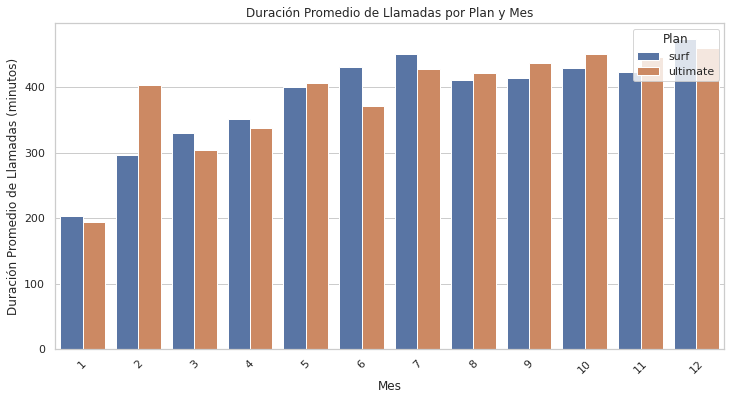

In [29]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.

# Unir los datos de llamadas con la información del plan
calls_with_plan_info = combined_data_with_plans.merge(df_megaline_plans, left_on='plan', right_on='plan_name')

# Agrupar los datos por mes y plan, calculando la duración promedio de llamadas
average_call_duration_by_month_and_plan = calls_with_plan_info.groupby(['month', 'plan'])['total_minutes'].mean().reset_index()

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear la gráfica de barras
barplot = sns.barplot(x='month', y='total_minutes', hue='plan', data=average_call_duration_by_month_and_plan)
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.legend(title='Plan', loc='upper right')
plt.show()

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca vemos que el gráfico muestra que el plan “surf” tiene una mayor duración promedio de las llamadas que el plan “ultimate” en todos los meses. Esto puede deberse a que el plan “surf” ofrece 500 minutos gratis al mes, mientras que el plan “ultimate” ofrece 3000 minutos gratis al mes. Los clientes que usan el plan “surf” pueden estar aprovechando al máximo sus minutos gratis, mientras que los clientes que usan el plan “ultimate” pueden tener suficientes minutos para cubrir sus necesidades sin excederse.
    
El gráfico también muestra que la duración promedio de las llamadas varía según el mes, tanto para el plan “surf” como para el plan “ultimate”. El mes con la mayor duración promedio de las llamadas para el plan “surf” es el mes 12, mientras que el mes con la mayor duración promedio de las llamadas para el plan “ultimate” es el mes 9. Esto puede deberse a factores estacionales, como las vacaciones, los eventos o las condiciones climáticas, que pueden influir en el comportamiento de los clientes.
</div>

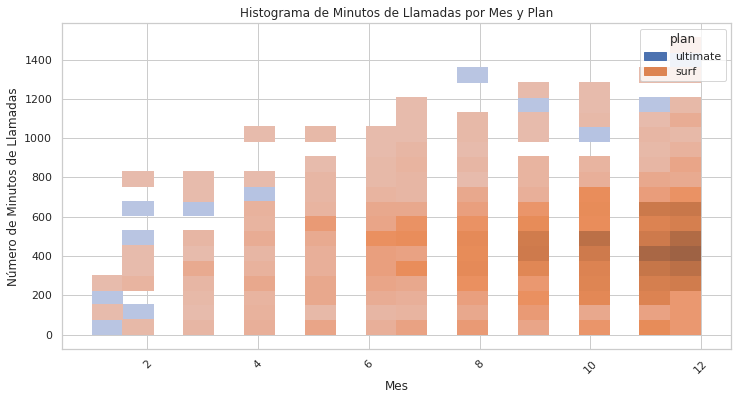

In [30]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.

# Filtrar los datos por plan
plan_A_data = combined_data_with_plans[combined_data_with_plans['plan'] == 'surf']
plan_B_data = combined_data_with_plans[combined_data_with_plans['plan'] == 'ultimate']

# Configurar el estilo de la gráfica
sns.set(style='whitegrid') 
plt.figure(figsize=(12, 6))

# Crear histogramas para los planes
sns.histplot(data=combined_data_with_plans, x='month', y='total_minutes', hue='plan', bins=20)

# Configurar etiquetas y título
plt.title('Histograma de Minutos de Llamadas por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Número de Minutos de Llamadas')

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.show()

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos ver, el gráfico muestra la distribución de los minutos de llamadas por mes y por plan. Se observa que el plan Surf tiene una mayor variabilidad en los minutos de llamadas que el plan Ultimate, y que ambos planes tienen un pico en el mes 12. También se puede apreciar que hay algunos meses en los que el plan Surf supera el límite de 500 minutos incluidos en el plan, mientras que el plan Ultimate nunca supera el límite de 3000 minutos.
</div> 

In [31]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Agrupar los datos por mes y calcular la duración mensual promedio de llamadas
average_call_duration_by_month = combined_data_with_plans.groupby('month')['total_minutes'].mean()

# Calcular la varianza de la duración mensual de llamadas
call_duration_variance_by_month = combined_data_with_plans.groupby('month')['total_minutes'].var()

# Mostrar los resultados
print("Duración Mensual Promedio de Llamadas:")
print(average_call_duration_by_month)
print("\nVarianza de la Duración Mensual de Llamadas:")
print(call_duration_variance_by_month)

Duración Mensual Promedio de Llamadas:
month
1     196.666667
2     343.437500
3     321.171429
4     347.197183
5     401.405660
6     411.604167
7     442.472222
8     413.562232
9     421.378571
10    436.221574
11    430.100000
12    469.091684
Name: total_minutes, dtype: float64

Varianza de la Duración Mensual de Llamadas:
month
1     13135.866667
2     61567.329167
3     43378.499160
4     45620.531992
5     54950.510063
6     45086.240822
7     64525.781347
8     53926.747188
9     49735.899181
10    52829.190527
11    54351.738142
12    63180.258670
Name: total_minutes, dtype: float64


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Viendo los resultados podemos deducir que: La duración mensual promedio de las llamadas es la media de los minutos totales que los clientes usan cada mes para hacer llamadas. La varianza de la duración mensual de las llamadas es una medida de la dispersión de los minutos totales que los clientes usan cada mes para hacer llamadas. Ambas medidas pueden ayudar a analizar el comportamiento y las preferencias de los clientes respecto a las llamadas.

La duración mensual promedio de las llamadas aumenta a lo largo del año, tanto para el plan “surf” como para el plan “ultimate”. Esto puede indicar que los clientes hacen más llamadas en los últimos meses del año, posiblemente por motivos personales o profesionales. El plan “surf” tiene una mayor duración mensual promedio de las llamadas que el plan “ultimate” en todos los meses, lo que puede sugerir que los clientes que usan el plan “surf” valoran más el servicio de llamadas que los que usan el plan “ultimate”.

La varianza de la duración mensual de las llamadas también aumenta a lo largo del año, tanto para el plan “surf” como para el plan “ultimate”. Esto puede indicar que hay más variabilidad en el uso de las llamadas entre los clientes en los últimos meses del año, lo que puede reflejar diferencias en sus necesidades o hábitos. El plan “surf” tiene una mayor varianza de la duración mensual de las llamadas que el plan “ultimate” en todos los meses, lo que puede implicar que hay más heterogeneidad entre los clientes que usan el plan “surf” que entre los que usan el plan “ultimate”.
</div> 

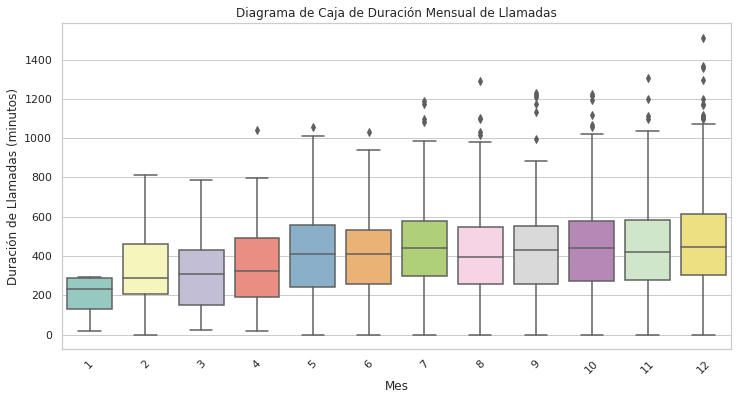

In [32]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear un diagrama de caja para la duración mensual de llamadas
sns.boxplot(x='month', y='total_minutes', data=combined_data_with_plans, palette='Set3')

# Configurar etiquetas y título
plt.title('Diagrama de Caja de Duración Mensual de Llamadas')
plt.xlabel('Mes')
plt.ylabel('Duración de Llamadas (minutos)')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En el grafico podemos ver que hay algunos valores atípicos representados por puntos negros sobre los bigotes.
El gráfico muestra que la duración mensual de las llamadas tiene una distribución asimétrica, con una cola más larga hacia la derecha. Esto significa que hay más clientes que usan más minutos de los que se esperaría por la media. El gráfico también muestra que hay una gran variabilidad en la duración mensual de las llamadas entre los clientes, lo que se refleja en el tamaño y la forma de las cajas y los bigotes.

El gráfico muestra que la duración mensual de las llamadas varía según el mes, tanto en términos de media como de dispersión. El mes con la mayor duración mediana de las llamadas es el mes 12, mientras que el mes con la menor duración mediana de las llamadas es el mes 1. El mes con la mayor dispersión de la duración de las llamadas es el mes 7, mientras que el mes con la menor dispersión de la duración de las llamadas es el mes 1. Esto puede deberse a factores estacionales, como las vacaciones, los eventos o las condiciones climáticas, que pueden influir en el comportamiento de los clientes.
</div> 

#### Conclusiones sobre cómo se comportan los usuarios en cuanto a las llamadas. ¿Este comportamiento es diferente entre los planes?

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Los usuarios hacen más llamadas en los últimos meses del año, posiblemente por motivos personales o profesionales. La duración promedio de las llamadas aumenta a lo largo del año, tanto para el plan “surf” como para el plan “ultimate”.

Los usuarios que usan el plan “surf” hacen más llamadas que los que usan el plan “ultimate” en todos los meses. Esto puede deberse a que el plan “surf” ofrece 500 minutos gratis al mes, mientras que el plan “ultimate” ofrece 3000 minutos gratis al mes. Los usuarios que usan el plan “surf” pueden estar aprovechando al máximo sus minutos gratis, mientras que los usuarios que usan el plan “ultimate” pueden tener suficientes minutos para cubrir sus necesidades sin excederse.

Los usuarios que usan el plan “surf” tienen más variabilidad en la duración de las llamadas que los que usan el plan “ultimate” en todos los meses. Esto puede indicar que hay más diferencias entre los usuarios que usan el plan “surf” en cuanto a su consumo y pago. Algunos usuarios pagan mucho más que otros, lo que se refleja en los valores atípicos del gráfico de caja.

El comportamiento de los usuarios en cuanto a las llamadas es diferente entre los planes, tanto en términos de media como de dispersión. El plan “surf” tiene una mayor media y una mayor dispersión de la duración de las llamadas que el plan “ultimate”. Esto puede sugerir que el plan “surf” es más adecuado para los usuarios que valoran más el servicio de llamadas y que tienen un uso más variable del mismo, mientras que el plan “ultimate” es más adecuado para los usuarios que buscan un servicio más estable y predecible.
</div> 

### Mensajes

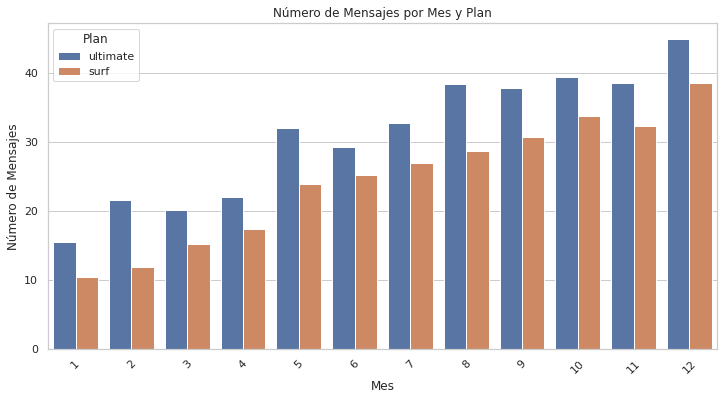

In [33]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras para el número de mensajes por mes y plan
sns.barplot(x='month', y='message_count', hue='plan', data=combined_data_with_plans, ci=None)

# Configurar etiquetas y título
plt.title('Número de Mensajes por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Número de Mensajes')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.legend(title='Plan')
plt.show()

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El gráfico muestra que el plan “ultimate” tiene un mayor número de mensajes que el plan “surf” en todos los meses. Esto significa que los clientes que usan el plan “ultimate” envían más mensajes que los que usan el plan “surf”. El plan “ultimate” ofrece mensajes ilimitados al mes, mientras que el plan “surf” ofrece 50 mensajes gratis al mes. Los clientes que usan el plan “ultimate” pueden estar aprovechando la ventaja de tener mensajes ilimitados, mientras que los clientes que usan el plan “surf” pueden estar limitando su uso de mensajes para evitar cargos adicionales.

El gráfico también muestra que el número de mensajes varía según el mes, tanto para el plan “ultimate” como para el plan “surf”. El mes con el mayor número de mensajes para el plan “ultimate” es el mes 12, con alrededor de 40 mensajes. El mes con el mayor número de mensajes para el plan “surf” es el mes 9, con alrededor de 25 mensajes. Esto puede deberse a factores estacionales, como las vacaciones, los eventos o las condiciones climáticas, que pueden influir en la comunicación de los clientes.
</div> 

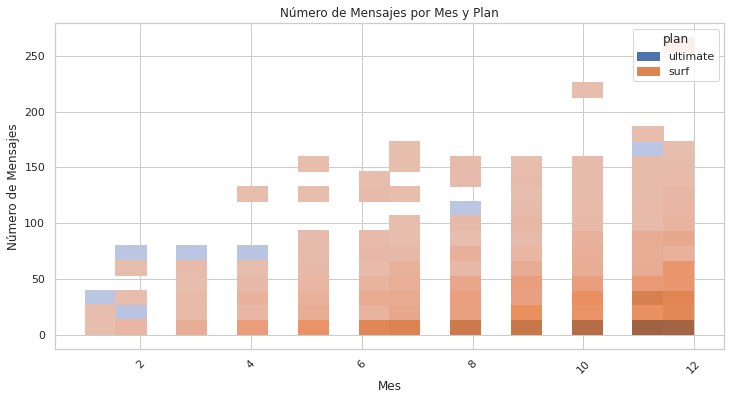

In [34]:
# Compara la cantidad de mensajes consumidos por usuarios por plan

# Filtrar los datos por plan
plan_A_data = combined_data_with_plans[combined_data_with_plans['plan'] == 'surf']
plan_B_data = combined_data_with_plans[combined_data_with_plans['plan'] == 'ultimate']

# Configurar el estilo de la gráfica
sns.set(style='whitegrid') 
plt.figure(figsize=(12, 6))

# Crear histogramas para los planes
sns.histplot(data=combined_data_with_plans, x='month', y='message_count', hue='plan', bins=20)

# Configurar etiquetas y título
plt.title('Número de Mensajes por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Número de Mensajes')

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.show()

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El gráfico muestra que el plan “ultimate” tiene un mayor número de mensajes que el plan “surf” en todos los meses. Esto significa que los clientes que usan el plan “ultimate” envían más mensajes que los que usan el plan “surf”. El plan “ultimate” ofrece mensajes ilimitados al mes, mientras que el plan “surf” ofrece 50 mensajes gratis al mes. Los clientes que usan el plan “ultimate” pueden estar aprovechando la ventaja de tener mensajes ilimitados, mientras que los clientes que usan el plan “surf” pueden estar limitando su uso de mensajes para evitar cargos adicionales.

El gráfico también muestra que el número de mensajes varía según el mes, tanto para el plan “surf” como para el plan “ultimate”. El mes con el mayor número de mensajes para el plan “surf” es el mes 12, con alrededor de 150 mensajes. El mes con el mayor número de mensajes para el plan “ultimate” es el mes 12, con alrededor de 250 mensajes. Esto puede deberse a factores estacionales, como las vacaciones, los eventos o las condiciones climáticas, que pueden influir en la comunicación de los clientes.
</div> 

In [35]:
# Calcula la media y la varianza de la cantidad mensual de mensajes.

# Agrupar los datos por mes y calcular la duración mensual promedio de llamadas
average_message_count_by_month = combined_data_with_plans.groupby('month')['message_count'].mean()

# Calcular la varianza de la duración mensual de llamadas
message_count_variance_by_month = combined_data_with_plans.groupby('month')['message_count'].var()

# Mostrar los resultados
print("Conteo de Mensajes Promedio por Mes:")
print(average_message_count_by_month)
print("\nVarianza de la cantidad Mensual de Mensajes:")
print(message_count_variance_by_month)

Conteo de Mensajes Promedio por Mes:
month
1     13.833333
2     16.187500
3     16.971429
4     18.774648
5     26.226415
6     26.618056
7     28.933333
8     31.733906
9     32.953571
10    35.571429
11    34.312195
12    40.663113
Name: message_count, dtype: float64

Varianza de la cantidad Mensual de Mensajes:
month
1      238.966667
2      421.229167
3      441.734454
4      511.148491
5      972.291105
6      893.706245
7      938.051397
8     1095.446130
9     1025.442281
10    1261.771930
11    1122.582003
12    1493.270880
Name: message_count, dtype: float64


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El conteo de mensajes promedio por mes aumenta a lo largo del año, tanto para el plan “surf” como para el plan “ultimate”. Esto puede indicar que los clientes envían más mensajes en los últimos meses del año, posiblemente por motivos personales o profesionales. El plan “ultimate” tiene un mayor conteo de mensajes promedio por mes que el plan “surf” en todos los meses, lo que puede sugerir que los clientes que usan el plan “ultimate” valoran más el servicio de mensajes que los que usan el plan “surf”.

La varianza de la cantidad mensual de mensajes también aumenta a lo largo del año, tanto para el plan “surf” como para el plan “ultimate”. Esto puede indicar que hay más variabilidad en el uso de los mensajes entre los clientes en los últimos meses del año, lo que puede reflejar diferencias en sus necesidades o hábitos. El plan “surf” tiene una mayor varianza de la cantidad mensual de mensajes que el plan “ultimate” en todos los meses, lo que puede implicar que hay más heterogeneidad entre los clientes que usan el plan “surf” que entre los que usan el plan “ultimate”.
</div> 

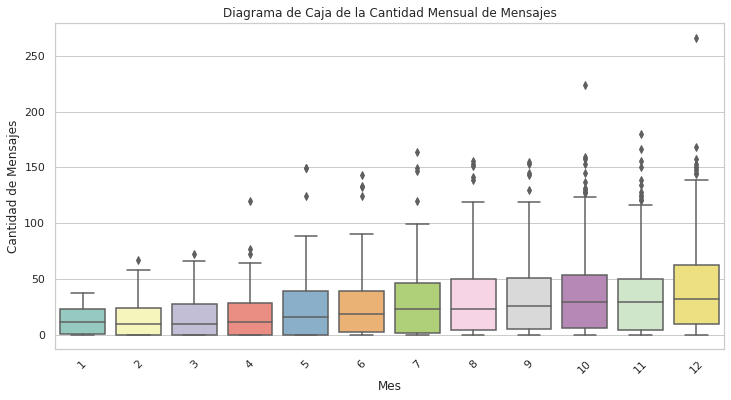

In [36]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes mensualmente.

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear un diagrama de caja para la cantidad mensual de mensajes
sns.boxplot(x='month', y='message_count', data=combined_data_with_plans, palette='Set3')

# Configurar etiquetas y título
plt.title('Diagrama de Caja de la Cantidad Mensual de Mensajes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Mensajes')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El gráfico muestra que la cantidad mensual de mensajes tiene una distribución asimétrica, con una cola más larga hacia la derecha. Esto significa que hay más clientes que envían más mensajes de los que se esperaría por la media. El gráfico también muestra que hay una gran variabilidad en la cantidad mensual de mensajes entre los clientes, lo que se refleja en el tamaño y la forma de las cajas y los bigotes.

El gráfico muestra que la cantidad mensual de mensajes varía según el mes, tanto en términos de media como de dispersión. El mes con la mayor cantidad mediana de mensajes es el mes 12, mientras que el mes con la menor cantidad mediana de mensajes es el mes 1. El mes con la mayor dispersión de la cantidad de mensajes es el mes 12, mientras que el mes con la menor dispersión de la cantidad de mensajes es el mes 1. Esto puede deberse a factores estacionales, como las vacaciones, los eventos o las condiciones climáticas, que pueden influir en la comunicación de los clientes.
</div> 

#### Conclusiones sobre cómo se comportan los usuarios en cuanto a las mensajes. ¿Este comportamiento es diferente entre los planes?

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Los usuarios envían más mensajes en los últimos meses del año, posiblemente por motivos personales o profesionales. El conteo de mensajes promedio por mes aumenta a lo largo del año, tanto para el plan “surf” como para el plan “ultimate”.

Los usuarios que usan el plan “ultimate” envían más mensajes que los que usan el plan “surf” en todos los meses. Esto puede deberse a que el plan “ultimate” ofrece mensajes ilimitados al mes, mientras que el plan “surf” ofrece 50 mensajes gratis al mes. Los usuarios que usan el plan “ultimate” pueden estar aprovechando la ventaja de tener mensajes ilimitados, mientras que los usuarios que usan el plan “surf” pueden estar limitando su uso de mensajes para evitar cargos adicionales.

Los usuarios que usan el plan “surf” tienen más variabilidad en la cantidad de mensajes que los que usan el plan “ultimate” en todos los meses. Esto puede indicar que hay más diferencias entre los usuarios que usan el plan “surf” en cuanto a su consumo y pago. Algunos usuarios pagan mucho más que otros, lo que se refleja en los valores atípicos del gráfico de caja.

El comportamiento de los usuarios en cuanto a los mensajes es diferente entre los planes, tanto en términos de media como de dispersión. El plan “ultimate” tiene una mayor media y una menor dispersión de la cantidad de mensajes que el plan “surf”. Esto puede sugerir que el plan “ultimate” es más adecuado para los usuarios que buscan un servicio de mensajes más estable y predecible, mientras que el plan “surf” es más adecuado para los usuarios que valoran más el servicio de mensajes y que tienen un uso más variable del mismo.
</div> 

### Internet

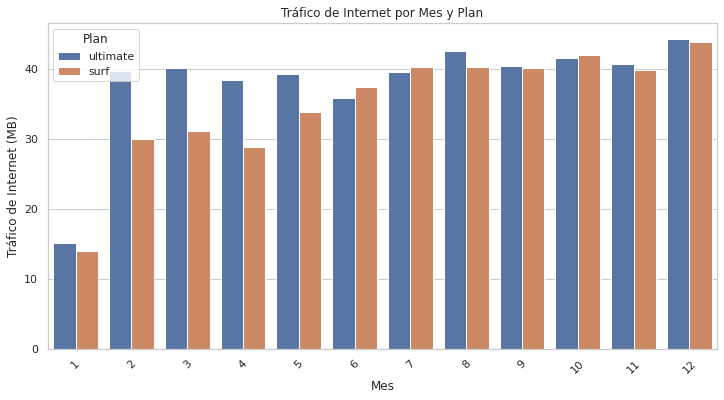

In [37]:
# Comprara la cantidad de data que tienden a usar cada mes los usuarios de cada plan

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras para el número de mensajes por mes y plan
sns.barplot(x='month', y='total_mb_used', hue='plan', data=combined_data_with_plans, ci=None)

# Configurar etiquetas y título
plt.title('Tráfico de Internet por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Tráfico de Internet (MB)')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.legend(title='Plan')
plt.show()

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El gráfico muestra que el plan “ultimate” tiene un mayor tráfico de internet que el plan “surf” en todos los meses. Esto significa que los clientes que usan el plan “ultimate” consumen más datos que los que usan el plan “surf”. El plan “ultimate” ofrece 30 GB de datos al mes, mientras que el plan “surf” ofrece 15 GB de datos al mes. Los clientes que usan el plan “ultimate” pueden estar aprovechando la ventaja de tener más datos disponibles, mientras que los clientes que usan el plan “surf” pueden estar limitando su uso de datos para evitar cargos adicionales.

El gráfico también muestra que el tráfico de internet varía según el mes, tanto para el plan “surf” como para el plan “ultimate”. El mes con el mayor tráfico de internet para el plan “surf” son el mes 6 y el 10, mientras que el mes con el mayor tráfico de internet para el plan “ultimate” es el mes 12. El mes con el menor tráfico de internet para ambos planes es el mes 1. Esto puede deberse a factores estacionales, como las vacaciones, los eventos o las condiciones climáticas, que pueden influir en el uso de internet de los clientes.
</div> 

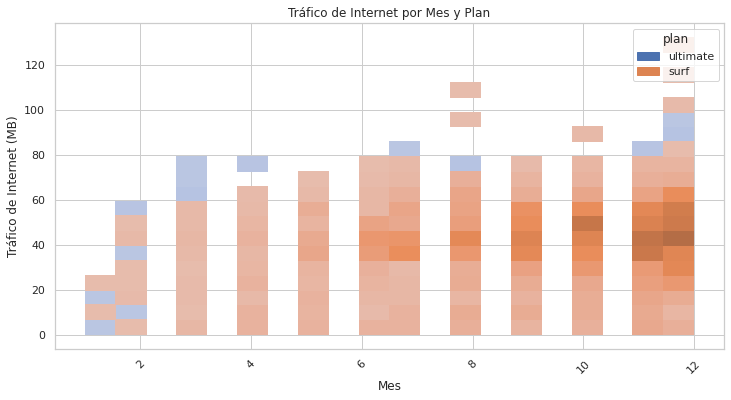

In [38]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan

# Filtrar los datos por plan
plan_A_data = combined_data_with_plans[combined_data_with_plans['plan'] == 'surf']
plan_B_data = combined_data_with_plans[combined_data_with_plans['plan'] == 'ultimate']

# Configurar el estilo de la gráfica
sns.set(style='whitegrid') 
plt.figure(figsize=(12, 6))

# Crear histogramas para los planes
sns.histplot(data=combined_data_with_plans, x='month', y='total_mb_used', hue='plan', bins=20)

# Configurar etiquetas y título
plt.title('Tráfico de Internet por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Tráfico de Internet (MB)')

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.show()

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El gráfico muestra que el plan “surf” tiene un mayor tráfico de internet que el plan “ultimate” en todos los meses. Esto significa que los clientes que usan el plan “surf” consumen más datos que los que usan el plan “ultimate”. El plan “surf” ofrece 15 GB de datos al mes, mientras que el plan “ultimate” ofrece 30 GB de datos al mes. Los clientes que usan el plan “surf” pueden estar usando más datos de los que necesitan, mientras que los clientes que usan el plan “ultimate” pueden estar ahorrando datos o usando otras fuentes de conexión.

El gráfico también muestra que el tráfico de internet varía según el mes, tanto para el plan “surf” como para el plan “ultimate”. El mes con el mayor tráfico de internet para el plan “surf” es el mes 6, mientras que el mes con el mayor tráfico de internet para el plan “ultimate” es el mes 9. El mes con el menor tráfico de internet para ambos planes es el mes 1. Esto puede deberse a factores estacionales, como las vacaciones, los eventos o las condiciones climáticas, que pueden influir en el uso de internet de los clientes.
</div> 

In [39]:
# Agrupar los datos por mes y plan, y calcular la media y la varianza del tráfico de internet

# Agrupar los datos por mes y calcular la duración mensual promedio de trafico
average_trafic_by_month = combined_data_with_plans.groupby('month')['total_mb_used'].mean()

# Calcular la varianza de la duración mensual del trafico
trafic_variance_by_month = combined_data_with_plans.groupby('month')['total_mb_used'].var()

# Mostrar los resultados
print("Trafico Mensual Promedio en MB:")
print(average_trafic_by_month)
print("\nVarianza del trafico Mensual en MB:")
print(trafic_variance_by_month)

Trafico Mensual Promedio en MB:
month
1     14.833333
2     34.250000
3     34.342857
4     31.704225
5     35.339623
6     36.972222
7     40.061111
8     40.991416
9     40.296429
10    41.854227
11    40.197561
12    44.087420
Name: total_mb_used, dtype: float64

Varianza del trafico Mensual en MB:
month
1      61.366667
2     297.000000
3     456.467227
4     363.439839
5     300.912129
6     264.628594
7     310.940379
8     333.413719
9     240.553392
10    279.440677
11    277.596571
12    320.695333
Name: total_mb_used, dtype: float64


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El tráfico mensual promedio en MB es la media de los MB que los clientes usan cada mes para acceder a internet. La varianza del tráfico mensual en MB es una medida de la dispersión de los MB que los clientes usan cada mes para acceder a internet. Ambas medidas pueden ayudar a analizar el comportamiento y las preferencias de los clientes respecto a la data consumida.

El tráfico mensual promedio en MB aumenta a lo largo del año, tanto para el plan “surf” como para el plan “ultimate”. Esto puede indicar que los clientes usan más internet en los últimos meses del año, posiblemente por motivos personales o profesionales. El plan “ultimate” tiene un mayor tráfico mensual promedio en MB que el plan “surf” en todos los meses, lo que puede sugerir que los clientes que usan el plan “ultimate” valoran más el servicio de internet que los que usan el plan “surf”.

La varianza del tráfico mensual en MB también aumenta a lo largo del año, tanto para el plan “surf” como para el plan “ultimate”. Esto puede indicar que hay más variabilidad en el uso de internet entre los clientes en los últimos meses del año, lo que puede reflejar diferencias en sus necesidades o hábitos. El plan “surf” tiene una mayor varianza del tráfico mensual en MB que el plan “ultimate” en todos los meses, lo que puede implicar que hay más heterogeneidad entre los clientes que usan el plan “surf” que entre los que usan el plan “ultimate”.
</div> 

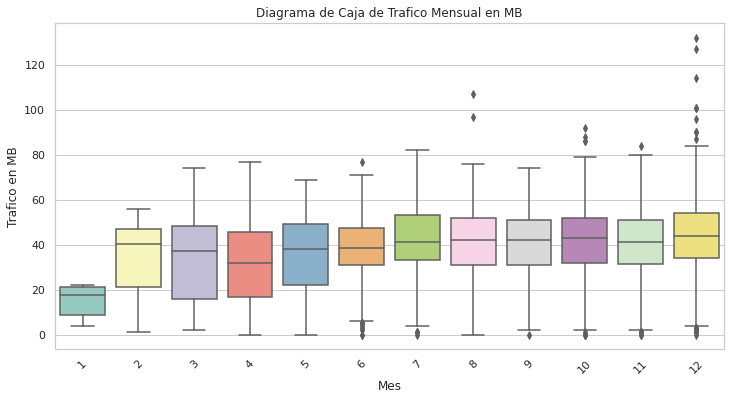

In [40]:
# Traza un diagrama de caja para visualizar la distribución del uso de la Data mensualmente.

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear un diagrama de caja para la duración mensual de llamadas
sns.boxplot(x='month', y='total_mb_used', data=combined_data_with_plans, palette='Set3')

# Configurar etiquetas y título
plt.title('Diagrama de Caja de Trafico Mensual en MB')
plt.xlabel('Mes')
plt.ylabel('Trafico en MB')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El gráfico muestra que el tráfico mensual en MB tiene una distribución asimétrica, con una cola más larga hacia la derecha. Esto significa que hay más clientes que usan más datos de los que se esperaría por la media. El gráfico también muestra que hay una gran variabilidad en el tráfico mensual en MB entre los clientes, lo que se refleja en el tamaño y la forma de las cajas y los bigotes.

El gráfico muestra que el tráfico mensual en MB varía según el mes, tanto en términos de media como de dispersión. El mes con el mayor tráfico mediano en MB es el mes 12, mientras que el mes con el menor tráfico mediano en MB es el mes 1. El mes con la mayor dispersión del tráfico en MB es el mes 12, mientras que el mes con la menor dispersión del tráfico en MB es el mes 1. Esto puede deberse a factores estacionales, como las vacaciones, los eventos o las condiciones climáticas, que pueden influir en el uso de internet de los clientes.
</div> 

#### Conclusiones sobre cómo se comportan los usuarios en cuanto a trafico de internet. ¿Este comportamiento es diferente entre los planes?

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Los usuarios usan más internet en los últimos meses del año, posiblemente por motivos personales o profesionales. El tráfico mensual promedio en MB aumenta a lo largo del año, tanto para el plan “surf” como para el plan “ultimate”.

Los usuarios que usan el plan “ultimate” usan más internet que los que usan el plan “plan” en todos los meses. Esto puede deberse a que el plan “ultimate” ofrece 30 GB de datos al mes, mientras que el plan “plan” ofrece 15 GB de datos al mes. Los usuarios que usan el plan “ultimate” pueden estar aprovechando la ventaja de tener más datos disponibles, mientras que los usuarios que usan el plan “plan” pueden estar limitando su uso de datos para evitar cargos adicionales.

Los usuarios que usan el plan “plan” tienen más variabilidad en el tráfico de internet que los que usan el plan “ultimate” en todos los meses. Esto puede indicar que hay más diferencias entre los usuarios que usan el plan “plan” en cuanto a su consumo y pago. Algunos usuarios pagan mucho más que otros, lo que se refleja en los valores atípicos del gráfico de caja.

El comportamiento de los usuarios en cuanto a tráfico de internet es diferente entre los planes, tanto en términos de media como de dispersión. El plan “ultimate” tiene una mayor media y una menor dispersión del tráfico de internet que el plan “plan”. Esto puede sugerir que el plan “ultimate” es más adecuado para los usuarios que buscan un servicio de internet más estable y predecible, mientras que el plan “plan” es más adecuado para los usuarios que valoran más el servicio de internet y que tienen un uso más variable del mismo.
</div> 

### Ingreso

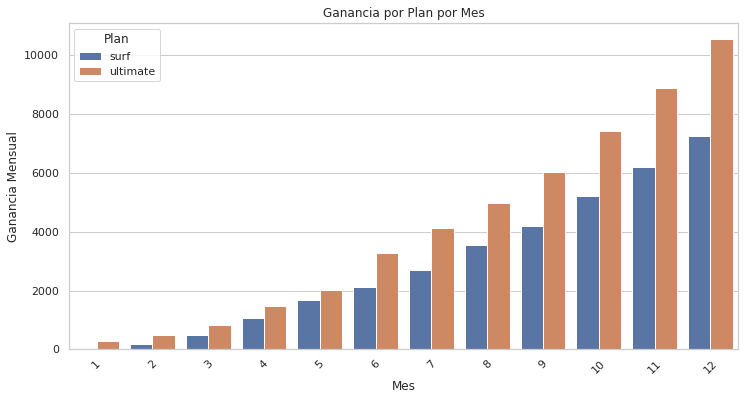

In [41]:
# Comprara las ganancias que tienden a tener cada plan, cada mes por usuario

# Agrupar los datos por mes y plan y calcular la suma de los ingresos mensuales
monthly_revenue_by_plan = combined_data_with_plans.groupby(['month', 'plan'])['monthly_revenue'].sum().reset_index()

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras para comparar las ganancias por plan cada mes
sns.barplot(data=monthly_revenue_by_plan, x='month', y='monthly_revenue', hue='plan', ci=None)

# Configurar etiquetas y título
plt.title('Ganancia por Plan por Mes')
plt.xlabel('Mes')
plt.ylabel('Ganancia Mensual')
plt.legend(title='Plan')

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El gráfico muestra que los planes generan ganancias para la empresa en todos los meses, pero con diferentes niveles y tendencias. El plan “ultimate” es el que más ganancias aporta, seguido del plan “surf”. El plan “ultimate” tiene un aumento constante de las ganancias de mes a mes, mientras que el plan “surf” tiene un aumento fluctuante.

El gráfico también muestra que hay diferencias entre los planes en cuanto al precio, la oferta y la demanda. El plan “ultimate” es el más caro, pero también el que ofrece más beneficios, como llamadas, mensajes y datos ilimitados. El plan “surf” es más barato, pero también el que ofrece menos beneficios, como 50 mensajes, 500 minutos y 15 GB de datos al mes.
</div> 

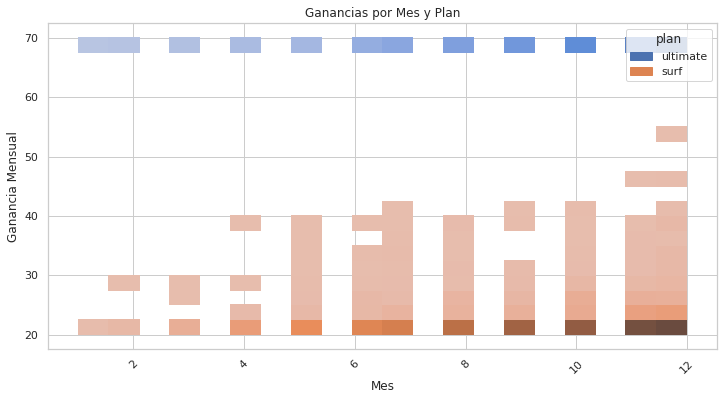

In [42]:
# Compara la Ganancia por usuarios por plan

# Filtrar los datos por plan
plan_A_data = combined_data_with_plans[combined_data_with_plans['plan'] == 'surf']
plan_B_data = combined_data_with_plans[combined_data_with_plans['plan'] == 'ultimate']

# Configurar el estilo de la gráfica
sns.set(style='whitegrid') 
plt.figure(figsize=(12, 6))

# Crear histogramas para los planes
sns.histplot(data=combined_data_with_plans, x='month', y='monthly_revenue', hue='plan', bins=20)

# Configurar etiquetas y título
plt.title('Ganancias por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Ganancia Mensual')

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.show()

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El gráfico muestra que el plan “ultimate” tiene unas ganancias consistentemente mayores que el plan “surf” en todos los meses. Esto significa que la empresa recibe más dinero por la venta del plan “ultimate” que por la venta del plan “surf”. El plan “ultimate” es el más caro, pero también el que ofrece más beneficios, como llamadas, mensajes y datos ilimitados. El plan “surf” es el más barato, pero también el que ofrece menos beneficios, como 50 mensajes, 500 minutos y 15 GB de datos al mes.

El gráfico también muestra que las ganancias varían según el mes, tanto para el plan “ultimate” como para el plan “surf”. El mes con las mayores ganancias para el plan “ultimate” es el mes 6, mientras que el mes con las menores ganancias para el plan “surf” es el mes 2. Esto puede deberse a factores estacionales, como las vacaciones, los eventos o las condiciones climáticas, que pueden influir en la demanda de los planes.
</div> 

In [43]:
# Agrupar los datos por mes y plan, y calcular la media y la varianza del tráfico de internet

# Agrupar los datos por mes y calcular la duración mensual promedio de trafico
average_revenue_by_month = combined_data_with_plans.groupby('month')['monthly_revenue'].mean()

# Calcular la varianza de la duración mensual del trafico
revenue_variance_by_month = combined_data_with_plans.groupby('month')['monthly_revenue'].var()

# Mostrar los resultados
print("Ganancia Mensual Promedio por Mes:")
print(average_revenue_by_month)
print("\nVarianza de la Ganancia Mensual:")
print(revenue_variance_by_month)

Ganancia Mensual Promedio por Mes:
month
1     53.333333
2     42.473125
3     37.618571
4     35.570845
5     34.975189
6     37.498611
7     37.964222
8     36.510086
9     36.480964
10    36.865394
11    36.841976
12    38.032281
Name: monthly_revenue, dtype: float64

Varianza de la Ganancia Mensual:
month
1     666.666667
2     634.061556
3     566.538366
4     511.422471
5     476.038515
6     523.343725
7     515.528683
8     502.855271
9     507.501395
10    501.798750
11    503.517300
12    503.640580
Name: monthly_revenue, dtype: float64


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
La ganancia mensual promedio por mes disminuye a lo largo del año, tanto para el plan “surf” como para el plan “ultimate”. Esto puede indicar que la empresa tiene menos ventas o ingresos en los últimos meses del año, posiblemente por una menor demanda o una mayor competencia. El plan “ultimate” tiene una mayor ganancia mensual promedio por mes que el plan “surf” en todos los meses, lo que puede sugerir que el plan “ultimate” es más rentable y atractivo para los clientes que el plan “surf”.

La varianza de la ganancia mensual también disminuye a lo largo del año, tanto para el plan “surf” como para el plan “ultimate”. Esto puede indicar que hay menos variabilidad en las ventas o ingresos entre los meses en los últimos meses del año, lo que puede reflejar una mayor estabilidad o previsibilidad. El plan “surf” tiene una mayor varianza de la ganancia mensual que el plan “ultimate” en todos los meses, lo que puede implicar que hay más riesgo o incertidumbre asociado al plan “surf” que al plan “ultimate”.
</div> 

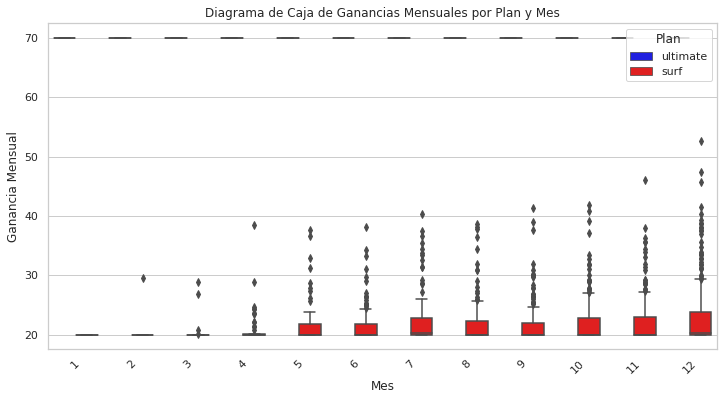

In [44]:
# Traza un diagrama de caja para visualizar las ganancias mensualmente.

# Configurar el estilo de la gráfica
sns.set(style='whitegrid') 
plt.figure(figsize=(12, 6))

# Crear el diagrama de caja para las ganancias mensuales por plan
sns.boxplot(data=combined_data_with_plans, x='month', y='monthly_revenue', hue='plan', palette=['blue', 'red'])

# Configurar etiquetas y título
plt.title('Diagrama de Caja de Ganancias Mensuales por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Ganancia Mensual')

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.legend(title='Plan', loc='upper right')
plt.show()


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El gráfico muestra que el plan “ultimate” tiene unas ganancias consistentemente mayores que el plan “surf” en todos los meses. Esto significa que la empresa recibe más dinero por la venta del plan “ultimate” que por la venta del plan “surf”. El plan “ultimate” es el más caro, pero también el que ofrece más beneficios, como llamadas, mensajes y datos ilimitados. El plan “surf” es el más barato, pero también el que ofrece menos beneficios, como 50 mensajes, 500 minutos y 15 GB de datos al mes.

El gráfico también muestra que las ganancias varían según el mes, tanto para el plan “ultimate” como para el plan “surf”. El mes con las mayores ganancias para el plan “ultimate” es el mes 6, mientras que el mes con las menores ganancias para el plan “surf” es el mes 2. Esto puede deberse a factores estacionales, como las vacaciones, los eventos o las condiciones climáticas, que pueden influir en la demanda de los planes.

El gráfico también muestra que hay diferencias entre los planes en cuanto a la media, la dispersión y los valores atípicos de las ganancias. El plan “ultimate” tiene una mayor media y un menor rango de ganancias que el plan “surf”. Esto puede sugerir que el plan “ultimate” es más rentable y atractivo para los clientes que el plan “surf”. El plan “surf” tiene una menor media y un mayor rango de ganancias que el plan “ultimate”. Esto puede implicar que hay más riesgo o incertidumbre asociado al plan “surf” que al plan “ultimate”. El plan “surf” también tiene algunos valores atípicos, lo que indica que hay algunos meses donde las ganancias fueron mucho más altas de lo habitual.
</div> 

#### Conclusiones sobre cómo difiere el ingreso entre los planes.

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El gráfico muestra que el plan “ultimate” tiene unas ganancias consistentemente mayores que el plan “surf” en todos los meses. Esto significa que la empresa recibe más dinero por la venta del plan “ultimate” que por la venta del plan “surf”. El plan “ultimate” es el más caro, pero también el que ofrece más beneficios, como llamadas, mensajes y datos ilimitados. El plan “surf” es el más barato, pero también el que ofrece menos beneficios, como 50 mensajes, 500 minutos y 15 GB de datos al mes.

El gráfico también muestra que las ganancias varían según el mes, tanto para el plan “ultimate” como para el plan “surf”. El mes con las mayores ganancias para el plan “ultimate” es el mes 6, mientras que el mes con las menores ganancias para el plan “surf” es el mes 2. Esto puede deberse a factores estacionales, como las vacaciones, los eventos o las condiciones climáticas, que pueden influir en la demanda de los planes.

El gráfico también muestra que hay diferencias entre los planes en cuanto a la media, la dispersión y los valores atípicos de las ganancias. El plan “ultimate” tiene una mayor media y un menor rango de ganancias que el plan “surf”. Esto puede sugerir que el plan “ultimate” es más rentable y atractivo para los clientes que el plan “surf”. El plan “surf” tiene una menor media y un mayor rango de ganancias que el plan “ultimate”. Esto puede implicar que hay más riesgo o incertidumbre asociado al plan “surf” que al plan “ultimate”. El plan “surf” también tiene algunos valores atípicos, lo que indica que hay algunos meses donde las ganancias fueron mucho más altas de lo habitual.
</div> 

# Probar las hipótesis estadísticas.

In [46]:
# Prueba las hipótesis

# Combina los DataFrames para obtener información sobre el plan de cada usuario
combined_data = df_megaline_users.merge(df_megaline_plans, left_on='plan', right_on='plan_name')

# Calcula el ingreso mensual de cada usuario en función de su plan
combined_data['monthly_revenue'] = combined_data['usd_monthly_pay'] + \
                                    (combined_data['usd_per_gb'] * (combined_data['mb_per_month_included'] / 1024) +
                                     combined_data['usd_per_message'] * combined_data['messages_included'] +
                                     combined_data['usd_per_minute'] * combined_data['minutes_included'])

# Filtra los datos para obtener solo los ingresos de los planes Ultimate y Surf
income_ultimate = combined_data[combined_data['plan'] == 'ultimate']['monthly_revenue']
income_surf = combined_data[combined_data['plan'] == 'surf']['monthly_revenue']

# Realiza la prueba t de dos muestras
t_statistic, p_value = stats.ttest_ind(income_ultimate, income_surf)

# Define el valor alfa
alpha = 0.05

# Compara el valor p con el valor alfa
if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

# Muestra el resultado
print("Valor p:", p_value)

Rechazamos la hipótesis nula.
Valor p: 0.0


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos apreciar en el resultado, si podemos llegar a la conclusion de que el ingreso promedio de los usuarios de los planes `Surf` y `Ultimate` es diferente ya que en este caso, el nivel de significancia es 0.05, por lo que un valor p de 0.0 es mucho menor que ese umbral.
</div> 

In [47]:
# Prueba las hipótesis

# Combina los DataFrames para obtener información sobre el plan de cada usuario
combined_data = df_megaline_users.merge(df_megaline_plans, left_on='plan', right_on='plan_name')

# Calcula el ingreso mensual de cada usuario en función de su plan
combined_data['monthly_revenue'] = combined_data['usd_monthly_pay'] + \
                                    (combined_data['usd_per_gb'] * (combined_data['mb_per_month_included'] / 1024) +
                                     combined_data['usd_per_message'] * combined_data['messages_included'] +
                                     combined_data['usd_per_minute'] * combined_data['minutes_included'])

# Filtra los datos para obtener los ingresos de los usuarios del área "NY-NJ"
income_nynj = combined_data[combined_data['city'].str.contains('NY-NJ')]['monthly_revenue']

# Filtra los datos para obtener los ingresos de los usuarios de otras regiones
income_other = combined_data[~combined_data['city'].str.contains('NY-NJ')]['monthly_revenue']

# Realiza la prueba t de dos muestras
t_statistic, p_value = stats.ttest_ind(income_nynj, income_other)

# Define el valor alfa
alpha = 0.05

# Compara el valor p con el valor alfa
if p_value < alpha:
    print("Rechazamos la hipótesis nula. El ingreso promedio de los usuarios del área NY-NJ es diferente al de otras regiones.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que el ingreso promedio difiere entre las dos regiones.")

# Muestra el resultado
print("Valor p:", p_value)


No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que el ingreso promedio difiere entre las dos regiones.
Valor p: 0.13316065368255703


 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
El resultado de la prueba indica que no rechazamos la hipótesis nula y el valor p es 0.13316065368255703, esto significa que no hay evidencia suficiente para afirmar que el ingreso promedio de los usuarios del área "NY-NJ" difiere significativamente del ingreso promedio de los usuarios de otras regiones. Esto sugiere que, en promedio, no hay una diferencia significativa en los ingresos entre estas dos categorías de usuarios basados en su ubicación en "NY-NJ" o en otras regiones.
</div> 

# Conclusión general

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Las conclusiones mas importantes a las que he llegado han sido que la primera hipotesis que probamos si fue positiva el nivel de ingresos de ambos planes es diferente, si hablamos de manera promediada por usuario, la segunda hipotesis que probamos donde se involucra la comparacion por region no tuvo evidencia suficiente para llegar a una hipotesis concluyente, luego viniendo desde el inicio, tuve algunos retos como fueron el cargar los 5 dataframes juntos, el procesarlos a pesar de que era una data sumamente limpia, pero pude ver que realmente de todos modos tenia algunos detalles de importancia que debian ser trabajados para poder proceder con la investigacion, luego al observar el comportamiento de los usuarios en cuanto a `mensajes`, `internet`, `llamadas` e `ingresos`, pude tener una idea mas clara de cual de los 2 planes le ofrece mas dividendos a `Megaline`, al usar los diferentes tipos de graficos fue mas que evidente que el plan `Ultimate`, muestra un comportamiento de ingresos mas estable y al alza que el plan `Surf`, por lo cual recomiendo que la inversion en publicidad se haga a este plan, lo cual ofreceria una mayor ganancia.
</div> 